In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/25-02-2024-TO-25-02-2025-COALINDIA-ALL-N.csv"
df = pd.read_csv(file_path)
print(df.head())
print(data.head())



    Symbol   Series         Date    Prev Close    Open Price    High Price    \
0  COALINDIA       EQ  26-Feb-2024         443.9         443.9        447.25   
1  COALINDIA       EQ  27-Feb-2024         442.3         442.3        445.30   
2  COALINDIA       EQ  28-Feb-2024         441.4         440.3        442.85   
3  COALINDIA       EQ  29-Feb-2024         434.2         444.0        444.00   
4  COALINDIA       EQ  01-Mar-2024         436.7         438.0        448.80   

   Low Price    Last Price    Close Price    Average Price   \
0       440.55        443.00         442.30          444.18   
1       435.05        441.10         441.40          440.44   
2       430.35        434.90         434.20          435.11   
3       429.65        438.90         436.70          435.37   
4       438.00        447.65         446.35          443.87   

  Total Traded Quantity         Turnover ₹   No. of Trades    \
0               75,70,244  3,36,25,40,348.80        1,00,405   
1           

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the data
file_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/25-02-2024-TO-25-02-2025-COALINDIA-ALL-N.csv"
data = pd.read_csv(file_path)

# Specify directory to save the file
save_dir = "/content/drive/My Drive/Stock_Analysis_&_Prediction/Stock_Reports"  # 🔹 Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Define full PDF file path
pdf_filename = os.path.join(save_dir, "COALINDIA_Stock_Analysis.pdf")

# Data Cleaning
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], format="%d-%b-%Y", errors='coerce')
data.set_index('Date', inplace=True)

# Convert numerical columns
numeric_cols = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
                'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover ₹',
                'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty']

for col in numeric_cols:
    data[col] = data[col].astype(str).str.replace(',', '').astype(float)

# Create PDF file
with PdfPages(pdf_filename) as pdf:

    # Trend Analysis
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close Price'], label='Close Price')
    plt.title('COALINDIA Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (₹)')
    plt.legend()
    pdf.savefig()
    plt.close()

    # Volume Analysis
    plt.figure(figsize=(14, 7))
    plt.plot(data['Total Traded Quantity'], label='Volume', color='purple')
    plt.title('COALINDIA Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    pdf.savefig()
    plt.close()

    # Daily Returns
    data['Daily Return'] = data['Close Price'].pct_change()
    plt.figure(figsize=(14, 7))
    plt.plot(data['Daily Return'], label='Daily Return', color='red')
    plt.title('COALINDIA Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    pdf.savefig()
    plt.close()

    # Correlation Heatmap
    numeric_data = data.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    pdf.savefig()
    plt.close()

    # Moving Averages
    data['7-Day MA'] = data['Close Price'].rolling(window=7).mean()
    data['30-Day MA'] = data['Close Price'].rolling(window=30).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Close Price'], label='Close Price', alpha=0.5)
    plt.plot(data['7-Day MA'], label='7-Day MA', linestyle='dashed')
    plt.plot(data['30-Day MA'], label='30-Day MA', linestyle='dotted')
    plt.title('COALINDIA Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (₹)')
    plt.legend()
    pdf.savefig()
    plt.close()

    # Bollinger Bands
    data['20-Day MA'] = data['Close Price'].rolling(window=20).mean()
    data['20-Day STD'] = data['Close Price'].rolling(window=20).std()
    data['Upper Band'] = data['20-Day MA'] + (data['20-Day STD'] * 2)
    data['Lower Band'] = data['20-Day MA'] - (data['20-Day STD'] * 2)

    plt.figure(figsize=(14, 7))
    plt.plot(data['Close Price'], label='Close Price', alpha=0.5)
    plt.plot(data['20-Day MA'], label='20-Day MA', linestyle='dashed')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='dotted', color='green')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='dotted', color='red')
    plt.title('COALINDIA Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price (₹)')
    plt.legend()
    pdf.savefig()
    plt.close()

    # RSI Calculation
    delta = data['Close Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    plt.figure(figsize=(14, 7))
    plt.plot(data['RSI'], label='RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title('COALINDIA RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    pdf.savefig()
    plt.close()

print(f"✅ Analysis saved in: {pdf_filename}")


✅ Analysis saved in: /content/drive/My Drive/Stock_Analysis_&_Prediction/Stock_Reports/COALINDIA_Stock_Analysis.pdf


In [ ]:
import pandas as pd
import os

def merge_csv_files(file_paths, output_file, column_names):
    """Merges multiple CSV files, keeping only specified columns with cleaned column names.

    Args:
        file_paths: A list of file paths to the CSV files.
        output_file: The path to save the merged CSV file.
        column_names: A list of column names to keep.
    """

    try:
        all_dataframes = []

        for file_path in file_paths:
            if os.path.exists(file_path):  # Check if file exists
                df = pd.read_csv(file_path)

                # Strip spaces from column names
                df.columns = df.columns.str.strip()


                missing_cols = [col for col in column_names if col not in df.columns]
                if missing_cols:
                    print(f"Warning: Missing columns {missing_cols} in {file_path}. Skipping this file.")
                    continue

                all_dataframes.append(df[column_names])  # Select the desired columns

            else:
                print(f"Warning: File not found: {file_path}")

        if not all_dataframes:
            print("No valid dataframes to merge.")
            return


        merged_df = pd.concat(all_dataframes, ignore_index=True)

        # Save the merged dataframe to a new CSV file
        merged_df.to_csv(output_file, index=False)
        print(f"Merged CSV file saved to: {output_file}")

    except Exception as e:
        print(f"An error occurred: {e}")


file1_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/01-01-2024-TO-31-12-2024-COALINDIA-ALL-N.csv"
file2_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/01-01-2023-TO-31-12-2023-COALINDIA-ALL-N.csv"
file3_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/01-01-2022-TO-31-12-2022-COALINDIA-ALL-N.csv"

output_file_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/merged_data.csv"
columns_to_keep = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
                   'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover ₹',
                   'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty']

merge_csv_files([file1_path, file2_path, file3_path], output_file_path, columns_to_keep)


Merged CSV file saved to: /content/drive/My Drive/Stock_Analysis_&_Prediction/merged_data.csv


<ipython-input-10-a302bde419ef>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.1436 - val_loss: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0165 - val_loss: 0.0019
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - val_loss: 6.5831e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - val_loss: 5.3896e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0064 - val_loss: 6.0153e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059 - val_loss: 4.8579e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070 - val_loss: 5.4364e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - val_loss: 5.9157e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0060 - val_loss: 4.5061e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - val_loss: 4.5533e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 4.1841e-04
Epoch 12/100
17

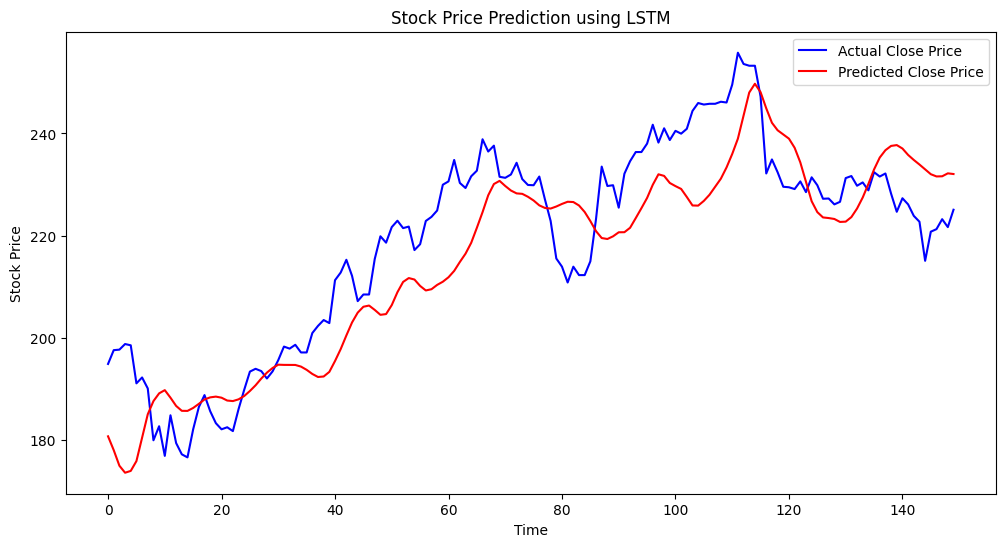

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
file_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/merged_data.csv"
df = pd.read_csv(file_path)

# Strip column names to remove extra spaces
df.columns = df.columns.str.strip()

# Convert all numerical columns: Remove commas, replace '-' with NaN, and convert to float
numeric_cols = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
                'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover ₹',
                'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')  # Remove commas
    df[col] = df[col].replace('-', np.nan)  # Replace '-' with NaN
    df[col] = df[col].astype(float)  # Convert to float


df.fillna(method='ffill', inplace=True)

# Select features
features = numeric_cols
data = df[features].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 5])
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 days to predict the next day's close price

# Train-Test Split (Ensuring time-series continuity)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - seq_length:]  # Overlap for proper sequencing

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
epochs = 100  # Increased epochs for better learning
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Make Predictions
y_pred = model.predict(X_test)

# Reverse scaling for proper price values
y_pred_actual = scaler.inverse_transform(
    np.hstack((np.zeros((y_pred.shape[0], 5)), y_pred, np.zeros((y_pred.shape[0], len(features) - 6))))
)[:, 5]

y_test_actual = scaler.inverse_transform(
    np.hstack((np.zeros((y_test.shape[0], 5)), y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features) - 6))))
)[:, 5]

# Plot Predictions vs Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='blue')
plt.plot(y_pred_actual, label='Predicted Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()


<ipython-input-2-02559bd709f0>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.1282 - val_loss: 0.0016
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - val_loss: 0.0012
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - val_loss: 6.3407e-04
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058 - val_loss: 8.0266e-04
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - val_loss: 8.1809e-04
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - val_loss: 0.0011
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072 - val_loss: 6.9472e-04
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - val_loss: 5.6415e-04
Epoch 9/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0070 - val_loss: 5.5531e-04
Epoch 10/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069 - val_loss: 5.2965e-04
Epoch 11/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 6.7490e-04
Epoch 12/200
17/17 ━

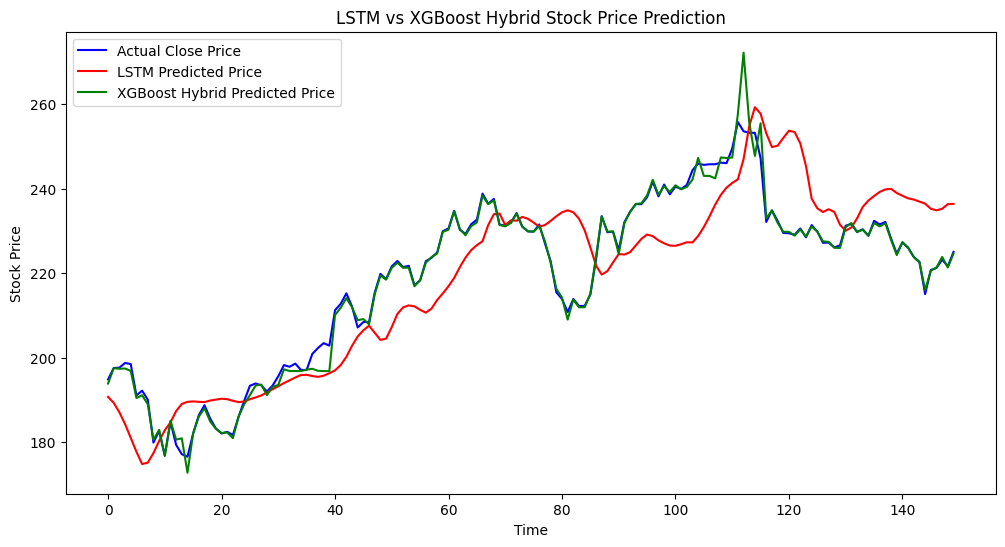

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

# Load Dataset
file_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/merged_data.csv"
df = pd.read_csv(file_path)

# Strip column names to remove extra spaces
df.columns = df.columns.str.strip()

# Convert all numerical columns: Remove commas, replace '-' with NaN, and convert to float
numeric_cols = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
                'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover ₹',
                'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')  # Remove commas
    df[col] = df[col].replace('-', np.nan)  # Replace '-' with NaN
    df[col] = df[col].astype(float)  # Convert to float

# **Handle Missing Values**
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select features
features = numeric_cols
data = df[features].values  # Convert dataframe to numpy array

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Use past 'seq_length' data points
        y.append(data[i + seq_length, 5])  # Predicting 'Close Price' (index 5)
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 days to predict the next day's close price

# Train-Test Split (Ensuring time-series continuity)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - seq_length:]  # Overlap for proper sequencing

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM model
input_layer = Input(shape=(seq_length, len(features)))

x = LSTM(64, return_sequences=True)(input_layer)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(32, return_sequences=False)(x)
lstm_output = Dense(25, activation='relu')(x)

output_layer = Dense(1)(lstm_output)
lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
epochs = 200  # Increased epochs for better learning
batch_size = 32

history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# **Extract LSTM Features for XGBoost**
lstm_features_train = lstm_model.predict(X_train)
lstm_features_test = lstm_model.predict(X_test)

# **Combine LSTM Features with Original Data for XGBoost**
xgb_train = np.hstack((lstm_features_train, data_scaled[seq_length:train_size]))  # Keep aligned with LSTM input
xgb_test = np.hstack((lstm_features_test, data_scaled[train_size:]))

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(xgb_train, y_train)

# **Make Predictions**
lstm_predictions = lstm_model.predict(X_test)
xgb_predictions = xgb_model.predict(xgb_test)

# **Reverse Scaling**
def inverse_transform(predictions):
    full_array = np.hstack((np.zeros((predictions.shape[0], 5)), predictions.reshape(-1, 1),
                            np.zeros((predictions.shape[0], len(features) - 6))))
    return scaler.inverse_transform(full_array)[:, 5]

lstm_pred_actual = inverse_transform(lstm_predictions)
xgb_pred_actual = inverse_transform(xgb_predictions)
y_test_actual = inverse_transform(y_test)

# **Plot Predictions**
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='blue')
plt.plot(lstm_pred_actual, label='LSTM Predicted Price', color='red')
plt.plot(xgb_pred_actual, label='XGBoost Hybrid Predicted Price', color='green')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('LSTM vs XGBoost Hybrid Stock Price Prediction')
plt.legend()
plt.show()


<ipython-input-11-a036398678cc>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training a new LSTM model...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0680
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0114
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046
Epoch 16/50
17/17 ━━━━━━━━━

LSTM model saved successfully at: /content/drive/My Drive/Stock_Analysis_&_Prediction/lstm_model.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


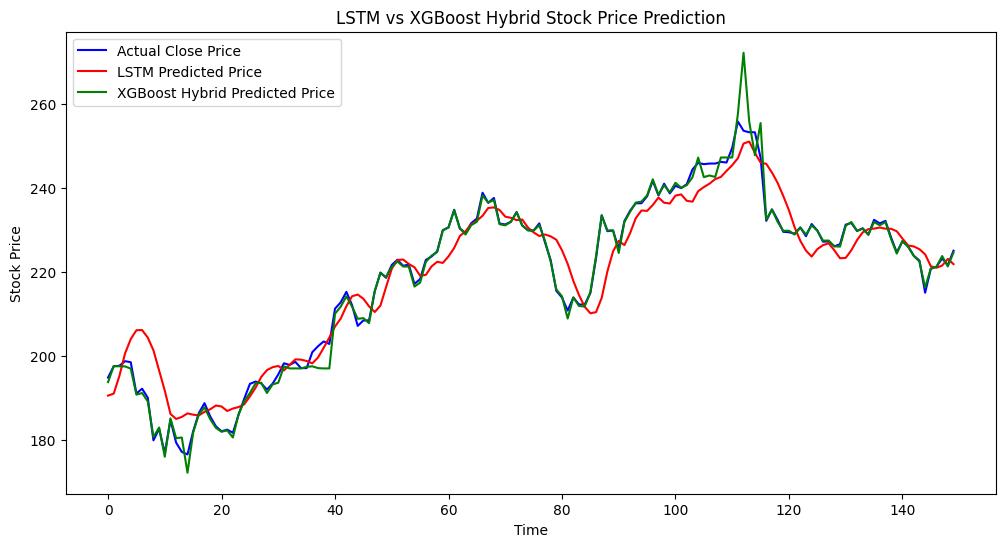

XGBoost model saved successfully at: /content/drive/My Drive/Stock_Analysis_&_Prediction/xgb_model.pkl


In [ ]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

# Load Dataset
file_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/merged_data.csv"
df = pd.read_csv(file_path)

# Strip column names to remove extra spaces
df.columns = df.columns.str.strip()

# Convert all numerical columns: Remove commas, replace '-' with NaN, and convert to float
numeric_cols = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
                'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover ₹',
                'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')  # Remove commas
    df[col] = df[col].replace('-', np.nan)  # Replace '-' with NaN
    df[col] = df[col].astype(float)  # Convert to float

# Handle Missing Values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select features
features = numeric_cols
data = df[features].values  # Convert dataframe to numpy array

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Use past 'seq_length' data points
        y.append(data[i + seq_length, 5])  # Predicting 'Close Price' (index 5)
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 days to predict the next day's close price

# Train-Test Split (Ensuring time-series continuity)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - seq_length:]  # Overlap for proper sequencing

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Google Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

# Define LSTM Model if it doesn't exist
lstm_model_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/lstm_model.h5"

if os.path.exists(lstm_model_path):
    lstm_model = load_model(lstm_model_path)
    print("LSTM Model loaded successfully.")
else:
    print("Training a new LSTM model...")
    lstm_model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Save the trained LSTM model
    lstm_model.save(lstm_model_path)
    print(f"LSTM model saved successfully at: {lstm_model_path}")

# Extract LSTM Features for XGBoost
lstm_features_train = lstm_model.predict(X_train)
lstm_features_test = lstm_model.predict(X_test)

# Combine LSTM Features with Original Data for XGBoost
xgb_train = np.hstack((lstm_features_train, data_scaled[seq_length:train_size]))  # Keep aligned with LSTM input
xgb_test = np.hstack((lstm_features_test, data_scaled[train_size:]))

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(xgb_train, y_train)

# Make Predictions
lstm_predictions = lstm_model.predict(X_test)
xgb_predictions = xgb_model.predict(xgb_test)

# Reverse Scaling
def inverse_transform(predictions):
    full_array = np.hstack((np.zeros((predictions.shape[0], 5)), predictions.reshape(-1, 1),
                            np.zeros((predictions.shape[0], len(features) - 6))))
    return scaler.inverse_transform(full_array)[:, 5]

lstm_pred_actual = inverse_transform(lstm_predictions)
xgb_pred_actual = inverse_transform(xgb_predictions)
y_test_actual = inverse_transform(y_test)

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='blue')
plt.plot(lstm_pred_actual, label='LSTM Predicted Price', color='red')
plt.plot(xgb_pred_actual, label='XGBoost Hybrid Predicted Price', color='green')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('LSTM vs XGBoost Hybrid Stock Price Prediction')
plt.legend()
plt.show()

# Save XGBoost Model to Google Drive
xgb_model_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/xgb_model.pkl"
with open(xgb_model_path, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

print(f"XGBoost model saved successfully at: {xgb_model_path}")


In [ ]:
import pickle
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

# Google Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

# File Paths
lstm_model_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/lstm_model.h5"
xgb_model_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/xgb_model.pkl"
csv_path = "/content/drive/My Drive/Stock_Analysis_&_Prediction/merged_data.csv"

# Load Dataset
df = pd.read_csv(csv_path)

# Strip column names to remove extra spaces
df.columns = df.columns.str.strip()

# Convert all numerical columns: Remove commas, replace '-' with NaN, and convert to float
numeric_cols = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
                'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover ₹',
                'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')  # Remove commas
    df[col] = df[col].replace('-', np.nan)  # Replace '-' with NaN
    df[col] = df[col].astype(float)  # Convert to float

# Handle Missing Values
df.fillna(method='ffill', inplace=True)

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[numeric_cols])

# Load Models
if os.path.exists(lstm_model_path):
    lstm_model = load_model(lstm_model_path)
    print("LSTM Model loaded successfully.")
else:
    raise FileNotFoundError(f"LSTM model not found at {lstm_model_path}")

if os.path.exists(xgb_model_path):
    with open(xgb_model_path, 'rb') as model_file:
        xgb_model = pickle.load(model_file)
    print("XGBoost Model loaded successfully.")
else:
    raise FileNotFoundError(f"XGBoost model not found at {xgb_model_path}")

# Prediction Function
def predict_close_price(open_price):
    seq_length = 60

    # Get the latest 59 days of data
    latest_data = data_scaled[-(seq_length - 1):]

    # Create a placeholder for the new day's input
    new_day = latest_data[-1].copy()  # Copy last row as template
    new_day[1] = open_price  # Set the Open Price (column index 1)

    # Append new day's data to the sequence
    input_sequence = np.vstack((latest_data, new_day))
    input_sequence = input_sequence.reshape(1, seq_length, len(numeric_cols))

    # Get LSTM feature output
    lstm_features = lstm_model.predict(input_sequence)

    # Combine LSTM Features with Scaled Data
    xgb_input = np.hstack((lstm_features, new_day.reshape(1, -1)))

    # Predict Close Price using XGBoost
    predicted_close_scaled = xgb_model.predict(xgb_input)

    # Reverse Scaling
    def inverse_transform(predictions):
        full_array = np.hstack((np.zeros((predictions.shape[0], 5)), predictions.reshape(-1, 1),
                                np.zeros((predictions.shape[0], len(numeric_cols) - 6))))
        return scaler.inverse_transform(full_array)[:, 5]  # Extract Close Price

    predicted_close = inverse_transform(predicted_close_scaled)[0]

    return predicted_close

# User Input for Open Price
open_price = float(input("Enter today's Open Price: "))
predicted_close_price = predict_close_price(open_price)

print(f"Predicted Close Price: {predicted_close_price:.2f}")


<ipython-input-13-37b0e56b2698>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LSTM Model loaded successfully.
XGBoost Model loaded successfully.
Enter today's Open Price: 467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted Close Price: 224.92
